In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sbn

# Training Data 

In [82]:
train_data= pd.read_csv('train.csv')

In [83]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [85]:
#train_data['Embarked'].replace('S', 1, inplace= True)
#train_data['Embarked'].replace('C', 2, inplace= True)
#train_data['Embarked'].replace('Q', 3, inplace= True)
#train_data['Embarked'].replace('nan', 0, inplace= True)

In [86]:
#Sex= train_data[['Sex']]
#Sex= pd.get_dummies(Sex)

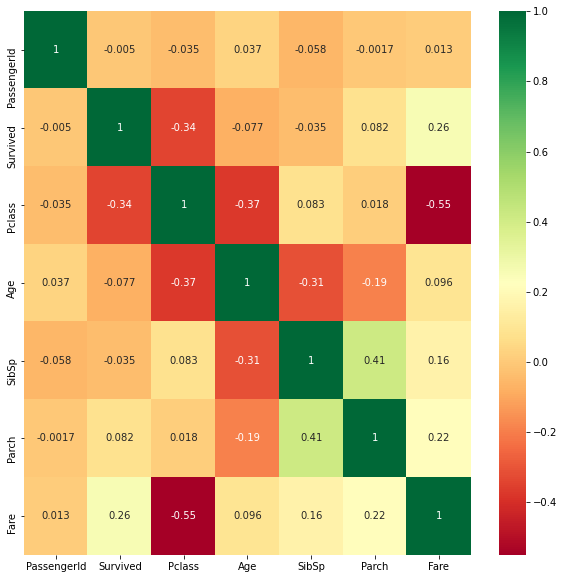

In [87]:
mlt.figure(figsize= (10,10))
sbn.heatmap(train_data.corr(), annot= True, cmap= 'RdYlGn')
mlt.show()

In [88]:
train_data.shape

(891, 12)

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
train_data.drop(['Cabin'], axis=1, inplace= True)

In [92]:
mean= train_data['Age'].mean()

In [93]:
mean

29.69911764705882

In [94]:
train_data['Age'].fillna('29.69911764705882', inplace= True)

In [95]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [96]:
train_data.dropna(inplace= True)

In [97]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
train_data.shape

(889, 11)

In [99]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
train_data.drop(['Name','Ticket'], axis=1, inplace= True)

In [101]:
Sex= train_data[['Sex']]
Sex= pd.get_dummies(Sex)

Embarked= train_data[['Embarked']]
Embarked= pd.get_dummies(Embarked)

In [102]:
train_data.drop(['Sex', 'Embarked'], axis=1, inplace= True)

In [103]:
data_train= pd.concat([train_data, Sex, Embarked], axis=1)

In [104]:
data_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


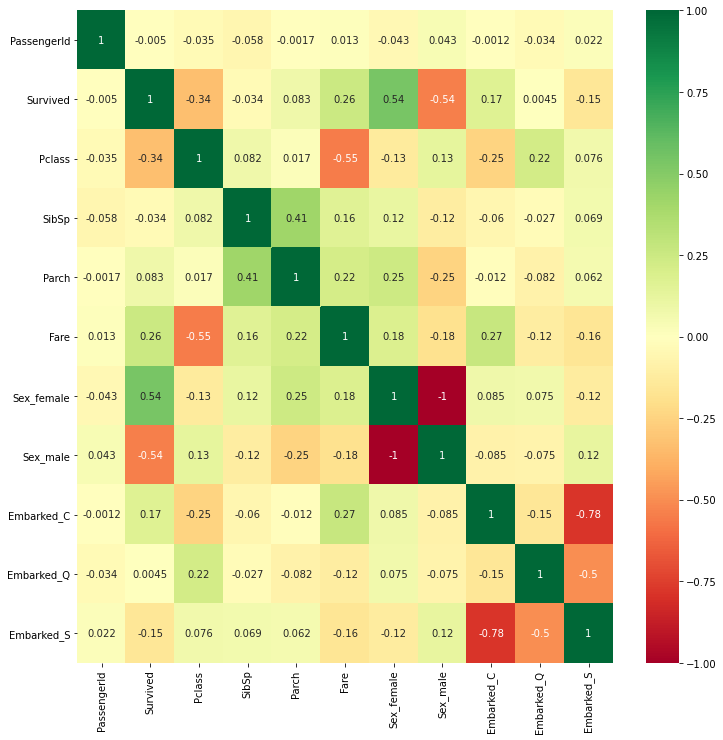

In [105]:
mlt.figure(figsize= (12,12))
sbn.heatmap(data_train.corr(), annot= True, cmap= 'RdYlGn')
mlt.show()

# Test Data

In [106]:
test_data= pd.read_csv('test.csv')

In [107]:
test_data.shape

(418, 11)

In [108]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [109]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [110]:
test_data.drop(['Cabin'], axis=1, inplace= True)

In [111]:
Mean_Age= test_data['Age'].mean()

In [112]:
Mean_Age

30.272590361445783

In [113]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [114]:
test_data['Age'].fillna('30.272590361445783', inplace=True)

In [115]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [116]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [117]:
test_data.shape

(418, 10)

In [118]:
test_data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [119]:
#test_data['Embarked'].replace('S', 1, inplace= True)
#test_data['Embarked'].replace('C', 2, inplace= True)
#test_data['Embarked'].replace('Q', 3, inplace= True)

In [120]:
test_data.shape

(418, 10)

In [121]:
test_data.drop(['Name','Ticket'], axis=1, inplace= True)

In [122]:
test_data.shape

(418, 8)

In [123]:
Sex= test_data[['Sex']]
Sex= pd.get_dummies(Sex)

Embarked= test_data[['Embarked']]
Embarked= pd.get_dummies(Embarked)

In [124]:
data_test= pd.concat([test_data, Sex, Embarked], axis=1)

In [125]:
test_data.shape

(418, 8)

In [126]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,1,0,0,0,1


In [127]:
data_test.drop(['Sex', 'Embarked'], axis=1, inplace= True)

In [128]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [129]:
data_test.value_counts()

PassengerId  Pclass  Age                 SibSp  Parch  Fare     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
892          3       34.5                0      0      7.8292   0           1         0           1           0             1
1102         3       32.0                0      0      22.5250  0           1         0           0           1             1
1178         3       30.272590361445783  0      0      7.2500   0           1         0           0           1             1
1177         3       36.0                0      0      7.2500   0           1         0           0           1             1
1176         3       2.0                 1      1      20.2125  1           0         0           0           1             1
                                                                                                                           ..
1028         3       26.5                0      0      7.2250   0           1         1           0           0            

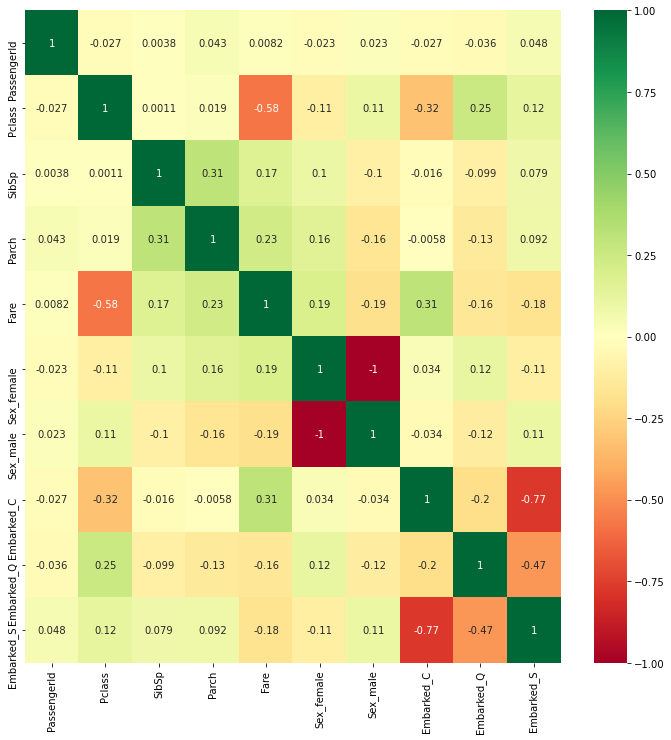

In [130]:
mlt.figure(figsize= (12,12))
sbn.heatmap(data_test.corr(), annot= True, cmap= 'RdYlGn')
mlt.show()

# Model Building

In [131]:
train_data.shape

(889, 7)

In [132]:
data_train.shape

(889, 12)

In [133]:
y= data_train['Survived']
x= data_train.drop(['Survived'], axis=1)

In [134]:
x.shape

(889, 11)

In [135]:
y.shape

(889,)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 12)

In [138]:
x_train.shape

(711, 11)

In [139]:
x_test.shape

(178, 11)

In [140]:
y_train.shape

(711,)

In [141]:
y_test.shape

(178,)

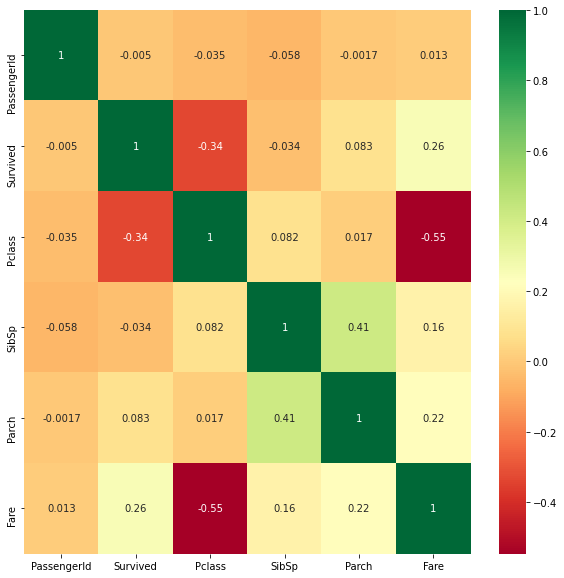

In [142]:
mlt.figure(figsize= (10,10))
sbn.heatmap(train_data.corr(), annot= True, cmap= 'RdYlGn')
mlt.show()

# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lreg= LogisticRegression()

In [145]:
lreg.fit(x_train, y_train)

C:\Users\otheruser\Anaconda_Jupyter\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
prediction= lreg.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_test, prediction)

0.797752808988764

# Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
dtc= DecisionTreeClassifier(max_depth= 4, random_state=0)

In [151]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [152]:
prediction= dtc.predict(x_test)

In [153]:
accuracy_score(y_test, prediction)

0.8314606741573034

# Random Forest Classifier

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rf_random= RandomForestRegressor()

In [156]:
# Randomised Search CV

# Number of Trees in Random Forest
n_estimators= [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of Features to Consider At Every Split
max_features= ['auto', 'sqrt']

# Maximum numbers of Level In A Tree
max_depth= [int(x) for x in np.linspace(5,30,num=6)]

# Minimum number of samples required to split a node
min_samples_split= [2,4,8,16,20,25,50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf= [2,4,6,8,10]

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [158]:
random_grid= {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [166]:
rf= RandomForestRegressor()

In [167]:
#rf_random= RandomizedSearchCV(estimator=rf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [168]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [169]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=900; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=900; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=900; total time=   2.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 16, 20,
                                                              25, 50, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [170]:
prediction= rf_random.predict(x_test)

In [171]:
accuracy_score(y_test, prediction)

ValueError: Classification metrics can't handle a mix of binary and continuous targets